# YOLOV8预训练模型预测-Python API-图像

同济子豪兄 2023-4-15

## 导入工具包

In [1]:
from ultralytics import YOLO

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

## 载入模型

In [2]:
# 载入预训练模型
# model = YOLO('yolov8n-pose.pt')
# model = YOLO('yolov8s-pose.pt')
# model = YOLO('yolov8m-pose.pt')
# model = YOLO('yolov8l-pose.pt')
# model = YOLO('yolov8x-pose.pt')
model = YOLO('yolov8x-pose-p6.pt')

## 模型自带信息

In [3]:
model.device

device(type='cpu')

In [4]:
model.names

{0: 'person'}

## 预测

传入图像、视频、摄像头ID（对应命令行的 source 参数）

In [5]:
# img_path = 'images/multi-person.jpeg'
img_path = 'images/two_runners.jpg'

In [6]:
results = model(img_path)


image 1/1 /home/featurize/work/两天搞定关键点检测毕业设计/3-【YOLOV8】关键点检测/【A】YOLOV8关键点检测-预训练模型预测/images/two_runners.jpg: 896x1280 2 persons, 110.8ms
Speed: 0.9ms preprocess, 110.8ms inference, 2.4ms postprocess per image at shape (1, 3, 1280, 1280)


## 解析预测结果

In [7]:
len(results)

1

In [8]:
results[0]

ultralytics.yolo.engine.results.Results object with attributes:

boxes: ultralytics.yolo.engine.results.Boxes object
keypoints: tensor([[[2.1208e+03, 1.0239e+03, 9.9247e-01],
         [2.1722e+03, 9.7642e+02, 9.8660e-01],
         [2.0732e+03, 9.8070e+02, 9.6992e-01],
         [2.2595e+03, 1.0234e+03, 9.1819e-01],
         [2.0159e+03, 1.0307e+03, 7.0158e-01],
         [2.3787e+03, 1.3690e+03, 9.9167e-01],
         [1.8846e+03, 1.3494e+03, 9.9508e-01],
         [2.4794e+03, 1.7673e+03, 9.5832e-01],
         [1.7117e+03, 1.7021e+03, 9.7836e-01],
         [2.4194e+03, 1.9844e+03, 9.5810e-01],
         [1.7484e+03, 2.0426e+03, 9.7678e-01],
         [2.2429e+03, 2.1260e+03, 9.9426e-01],
         [1.9274e+03, 2.1097e+03, 9.9500e-01],
         [2.2078e+03, 2.6880e+03, 9.8913e-01],
         [1.9820e+03, 2.6844e+03, 9.9020e-01],
         [2.1004e+03, 3.1881e+03, 9.4162e-01],
         [1.9326e+03, 2.9514e+03, 9.5100e-01]],

        [[3.1806e+03, 1.2541e+03, 9.9267e-01],
         [3.2253e+03, 1.

## 解析目标检测预测结果

In [9]:
# 预测框的所有类别（MS COCO数据集八十类）
results[0].names

{0: 'person'}

In [10]:
# 预测类别 ID
results[0].boxes.cls

tensor([0., 0.], device='cuda:0')

In [11]:
num_bbox = len(results[0].boxes.cls)
print('预测出 {} 个框'.format(num_bbox))

预测出 2 个框


In [12]:
# 每个框的置信度
results[0].boxes.conf

tensor([0.9456, 0.9435], device='cuda:0')

In [13]:
# 每个框的：左上角XY坐标、右下角XY坐标
results[0].boxes.xyxy

tensor([[1643.,  775., 2534., 3390.],
        [2821., 1057., 3543., 3388.]], device='cuda:0')

In [14]:
# 转成整数的 numpy array
bboxes_xyxy = results[0].boxes.xyxy.cpu().numpy().astype('uint32')

In [15]:
bboxes_xyxy

array([[1643,  775, 2534, 3390],
       [2821, 1057, 3543, 3388]], dtype=uint32)

## 解析关键点检测预测结果

In [16]:
# 每个框，每个关键点的 XY坐标 置信度
results[0].keypoints.shape

torch.Size([2, 17, 3])

In [18]:
# results[0].keypoints

In [19]:
bboxes_keypoints = results[0].keypoints.cpu().numpy().astype('uint32')

In [20]:
# 转为 numpy array
bboxes_keypoints

array([[[2120, 1023,    0],
        [2172,  976,    0],
        [2073,  980,    0],
        [2259, 1023,    0],
        [2015, 1030,    0],
        [2378, 1368,    0],
        [1884, 1349,    0],
        [2479, 1767,    0],
        [1711, 1702,    0],
        [2419, 1984,    0],
        [1748, 2042,    0],
        [2242, 2125,    0],
        [1927, 2109,    0],
        [2207, 2688,    0],
        [1982, 2684,    0],
        [2100, 3188,    0],
        [1932, 2951,    0]],

       [[3180, 1254,    0],
        [3225, 1215,    0],
        [3128, 1212,    0],
        [3280, 1268,    0],
        [3049, 1265,    0],
        [3354, 1513,    0],
        [2959, 1570,    0],
        [3452, 1753,    0],
        [2873, 1901,    0],
        [3494, 2010,    0],
        [3043, 1838,    0],
        [3297, 2173,    0],
        [3038, 2213,    0],
        [3308, 2614,    0],
        [3071, 2722,    0],
        [3274, 3004,    0],
        [3109, 3168,    0]]], dtype=uint32)

## OpenCV可视化关键点

In [21]:
img_bgr = cv2.imread(img_path)

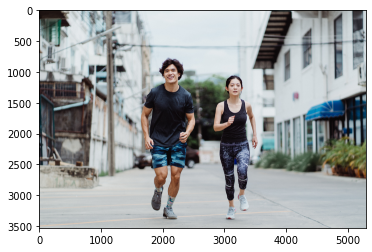

In [22]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()

In [23]:
# 框（rectangle）可视化配置
bbox_color = (150, 0, 0)             # 框的 BGR 颜色
bbox_thickness = 6                   # 框的线宽

# 框类别文字
bbox_labelstr = {
    'font_size':6,         # 字体大小
    'font_thickness':14,   # 字体粗细
    'offset_x':0,          # X 方向，文字偏移距离，向右为正
    'offset_y':-80,        # Y 方向，文字偏移距离，向下为正
}

In [24]:
# 关键点 BGR 配色
kpt_color_map = {
    0:{'name':'Nose', 'color':[0, 0, 255], 'radius':25},                # 鼻尖
    1:{'name':'Right Eye', 'color':[255, 0, 0], 'radius':25},           # 右边眼睛
    2:{'name':'Left Eye', 'color':[255, 0, 0], 'radius':25},            # 左边眼睛
    3:{'name':'Right Ear', 'color':[0, 255, 0], 'radius':25},           # 右边耳朵
    4:{'name':'Left Ear', 'color':[0, 255, 0], 'radius':25},            # 左边耳朵
    5:{'name':'Right Shoulder', 'color':[193, 182, 255], 'radius':25},  # 右边肩膀
    6:{'name':'Left Shoulder', 'color':[193, 182, 255], 'radius':25},   # 左边肩膀
    7:{'name':'Right Elbow', 'color':[16, 144, 247], 'radius':25},      # 右侧胳膊肘
    8:{'name':'Left Elbow', 'color':[16, 144, 247], 'radius':25},       # 左侧胳膊肘
    9:{'name':'Right Wrist', 'color':[1, 240, 255], 'radius':25},       # 右侧手腕
    10:{'name':'Left Wrist', 'color':[1, 240, 255], 'radius':25},       # 左侧手腕
    11:{'name':'Right Hip', 'color':[140, 47, 240], 'radius':25},       # 右侧胯
    12:{'name':'Left Hip', 'color':[140, 47, 240], 'radius':25},        # 左侧胯
    13:{'name':'Right Knee', 'color':[223, 155, 60], 'radius':25},      # 右侧膝盖
    14:{'name':'Left Knee', 'color':[223, 155, 60], 'radius':25},       # 左侧膝盖
    15:{'name':'Right Ankle', 'color':[139, 0, 0], 'radius':25},        # 右侧脚踝
    16:{'name':'Left Ankle', 'color':[139, 0, 0], 'radius':25},         # 左侧脚踝
}

# 骨架连接 BGR 配色
skeleton_map = [
    {'srt_kpt_id':15, 'dst_kpt_id':13, 'color':[0, 100, 255], 'thickness':5},       # 右侧脚踝-右侧膝盖
    {'srt_kpt_id':13, 'dst_kpt_id':11, 'color':[0, 255, 0], 'thickness':5},         # 右侧膝盖-右侧胯
    {'srt_kpt_id':16, 'dst_kpt_id':14, 'color':[255, 0, 0], 'thickness':5},         # 左侧脚踝-左侧膝盖
    {'srt_kpt_id':14, 'dst_kpt_id':12, 'color':[0, 0, 255], 'thickness':5},         # 左侧膝盖-左侧胯
    {'srt_kpt_id':11, 'dst_kpt_id':12, 'color':[122, 160, 255], 'thickness':5},     # 右侧胯-左侧胯
    {'srt_kpt_id':5, 'dst_kpt_id':11, 'color':[139, 0, 139], 'thickness':5},        # 右边肩膀-右侧胯
    {'srt_kpt_id':6, 'dst_kpt_id':12, 'color':[237, 149, 100], 'thickness':5},      # 左边肩膀-左侧胯
    {'srt_kpt_id':5, 'dst_kpt_id':6, 'color':[152, 251, 152], 'thickness':5},       # 右边肩膀-左边肩膀
    {'srt_kpt_id':5, 'dst_kpt_id':7, 'color':[148, 0, 69], 'thickness':5},          # 右边肩膀-右侧胳膊肘
    {'srt_kpt_id':6, 'dst_kpt_id':8, 'color':[0, 75, 255], 'thickness':5},          # 左边肩膀-左侧胳膊肘
    {'srt_kpt_id':7, 'dst_kpt_id':9, 'color':[56, 230, 25], 'thickness':5},         # 右侧胳膊肘-右侧手腕
    {'srt_kpt_id':8, 'dst_kpt_id':10, 'color':[0,240, 240], 'thickness':5},         # 左侧胳膊肘-左侧手腕
    {'srt_kpt_id':1, 'dst_kpt_id':2, 'color':[224,255, 255], 'thickness':5},        # 右边眼睛-左边眼睛
    {'srt_kpt_id':0, 'dst_kpt_id':1, 'color':[47,255, 173], 'thickness':5},         # 鼻尖-左边眼睛
    {'srt_kpt_id':0, 'dst_kpt_id':2, 'color':[203,192,255], 'thickness':5},         # 鼻尖-左边眼睛
    {'srt_kpt_id':1, 'dst_kpt_id':3, 'color':[196, 75, 255], 'thickness':5},        # 右边眼睛-右边耳朵
    {'srt_kpt_id':2, 'dst_kpt_id':4, 'color':[86, 0, 25], 'thickness':5},           # 左边眼睛-左边耳朵
    {'srt_kpt_id':3, 'dst_kpt_id':5, 'color':[255,255, 0], 'thickness':5},          # 右边耳朵-右边肩膀
    {'srt_kpt_id':4, 'dst_kpt_id':6, 'color':[255, 18, 200], 'thickness':5}         # 左边耳朵-左边肩膀
]

In [25]:
for idx in range(num_bbox): # 遍历每个框
    
    # 获取该框坐标
    bbox_xyxy = bboxes_xyxy[idx] 
    
    # 获取框的预测类别（对于关键点检测，只有一个类别）
    bbox_label = results[0].names[0]
    
    # 画框
    img_bgr = cv2.rectangle(img_bgr, (bbox_xyxy[0], bbox_xyxy[1]), (bbox_xyxy[2], bbox_xyxy[3]), bbox_color, bbox_thickness)
    
    # 写框类别文字：图片，文字字符串，文字左上角坐标，字体，字体大小，颜色，字体粗细
    img_bgr = cv2.putText(img_bgr, bbox_label, (bbox_xyxy[0]+bbox_labelstr['offset_x'], bbox_xyxy[1]+bbox_labelstr['offset_y']), cv2.FONT_HERSHEY_SIMPLEX, bbox_labelstr['font_size'], bbox_color, bbox_labelstr['font_thickness'])
    
    bbox_keypoints = bboxes_keypoints[idx] # 该框所有关键点坐标和置信度
    
    # 画该框的骨架连接
    for skeleton in skeleton_map:
        
        # 获取起始点坐标
        srt_kpt_id = skeleton['srt_kpt_id']
        srt_kpt_x = bbox_keypoints[srt_kpt_id][0]
        srt_kpt_y = bbox_keypoints[srt_kpt_id][1]
        
        # 获取终止点坐标
        dst_kpt_id = skeleton['dst_kpt_id']
        dst_kpt_x = bbox_keypoints[dst_kpt_id][0]
        dst_kpt_y = bbox_keypoints[dst_kpt_id][1]
        
        # 获取骨架连接颜色
        skeleton_color = skeleton['color']
        
        # 获取骨架连接线宽
        skeleton_thickness = skeleton['thickness']
        
        # 画骨架连接
        img_bgr = cv2.line(img_bgr, (srt_kpt_x, srt_kpt_y),(dst_kpt_x, dst_kpt_y),color=skeleton_color,thickness=skeleton_thickness)
        
    # 画该框的关键点
    for kpt_id in kpt_color_map:
        kpt_color = kpt_color_map[kpt_id]['color']
        kpt_radius = kpt_color_map[kpt_id]['radius']
        kpt_x = bbox_keypoints[kpt_id][0]
        kpt_y = bbox_keypoints[kpt_id][1]
        img_bgr = cv2.circle(img_bgr, (kpt_x, kpt_y), kpt_radius, kpt_color, -1)

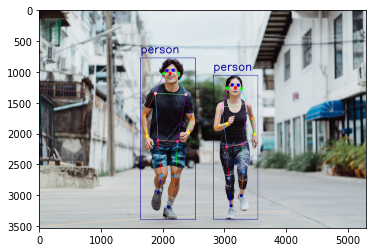

In [26]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()

In [27]:
cv2.imwrite('C1_output.jpg', img_bgr)

True